Code for Assignment 5 - GGE 6505 
Group 10

Data Exploration and Visualization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [80]:
#here we will create a dataframe using pandas to access the data on the CSV file
df = pd.read_csv('data.csv')

#We need to see what we are working with now
df.head()

,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Min,Avg.,Min,Avg.,NaN,NaN,NaN,NaN,NaN,Gender,Somking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0,NaN,NaN,Male=1,Non-smoker=1
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0,NaN,NaN,Female=0,Ex-smoker=2
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0,NaN,NaN,NaN,Active-smoker=3


In [81]:
#Now we can drop the last 4 columns and first two rows

df = df.drop(df.columns[[-1, -2, -3, -4]], axis = 1)

df.head()

df = df.drop([0, 1])

df.head()



,Diagnosis,ID,Imaginary Part,Unnamed: 3,Real Part,Unnamed: 5,Gender,Age,Smoking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
5,COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
6,COPD,305-4,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0


In [84]:
df.columns = ['diagnosis', 'ID', 'imaginary_min', 'imaginary_avg', 'real_min', 'real_avg', 'gender', 'age', 'smoking']

df.head()

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77.0,2.0
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72.0,2.0
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73.0,3.0
5,COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1.0,76.0,2.0
6,COPD,305-4,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65.0,2.0


In [85]:
#Now to see the info of the dataframe

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 2 to 400
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   diagnosis      399 non-null    object 
 1   ID             399 non-null    object 
 2   imaginary_min  100 non-null    object 
 3   imaginary_avg  100 non-null    object 
 4   real_min       100 non-null    object 
 5   real_avg       100 non-null    object 
 6   gender         399 non-null    float64
 7   age            399 non-null    float64
 8   smoking        399 non-null    float64
dtypes: float64(3), object(6)
memory usage: 28.2+ KB
None


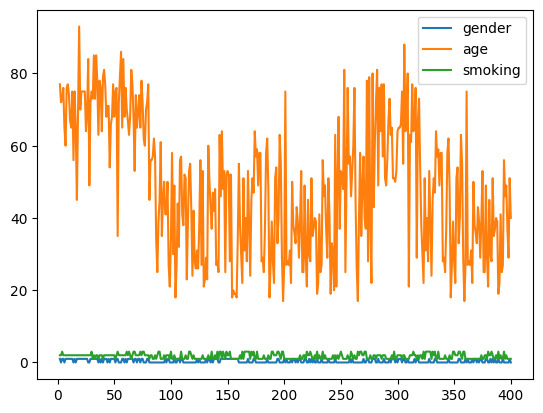

In [86]:
#We can do a general plot to see what comes of it
df.plot()
plt.show()

In [93]:
#Here we will look into the youngest age by diagnosis

min_age = df.groupby(['diagnosis'])[['age']].min()
min_age

,age
diagnosis,
Asthma,17.0
COPD,35.0
HC,17.0
Infected,17.0


In [88]:
#Here we will look into the oldest age by diagnosis

max_age = df.groupby(['diagnosis'])[['age']].max()
max_age

,age
diagnosis,
Asthma,88.0
COPD,93.0
HC,75.0
Infected,75.0


In [94]:
#Here we will look into the mean age by diagnosis

mean_age = df.groupby(['diagnosis'])[['age']].mean()
mean_age

,age
diagnosis,
Asthma,55.375000
COPD,70.873418
HC,39.487500
Infected,38.737500


In [95]:
#Here we will look into how many smokers by sex
#For smoking: 1- non-smoker, 2-ex smoker, 3- active smoker
#For gender: 0- Female, 1-Male

smoking_number = df.groupby(['smoking', 'gender'])['diagnosis'].count()
smoking_number

smoking  gender
1.0      0.0       122
         1.0        57
2.0      0.0        72
         1.0        78
3.0      0.0        46
         1.0        24
Name: diagnosis, dtype: int64

In [97]:
age_count = df.groupby(['diagnosis'])[['age']].agg(['mean', 'min', 'max','count'])
age_count


age                  
                mean   min   max count
diagnosis                             
Asthma     55.375000  17.0  88.0    80
COPD       70.873418  35.0  93.0    79
HC         39.487500  17.0  75.0   160
Infected   38.737500  17.0  75.0    80

In [102]:
#Now we can convert the ages into bins

# convert 'age' column from float to integer
df['age'] = df['age'].astype(int)

# Define the bin edges
bins = range(0, max(df['age']) + 10, 10)

# Create a new column with the age bin labels
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=[f'{i}-{i+9}' for i in bins[:-1]])

df

,diagnosis,ID,imaginary_min,imaginary_avg,real_min,real_avg,gender,age,smoking,age_bin
2,COPD,301-4,-320.61,-300.5635307,-495.26,-464.1719907,1.0,77,2.0,70-79
3,COPD,302-3,-325.39,-314.7503595,-473.73,-469.2631404,0.0,72,2.0,70-79
4,COPD,303-3,-323,-317.4360556,-476.12,-471.8976667,1.0,73,3.0,70-79
5,COPD,304-4,-327.78,-317.3996698,-473.73,-468.856388,1.0,76,2.0,70-79
6,COPD,305-4,-325.39,-316.1557853,-478.52,-472.8697828,0.0,65,2.0,60-69
...,...,...,...,...,...,...,...,...,...,...
396,Infected,I176,NaN,NaN,NaN,NaN,0.0,49,2.0,40-49
397,Infected,I177,NaN,NaN,NaN,NaN,0.0,37,1.0,30-39
398,Infected,I178,NaN,NaN,NaN,NaN,0.0,29,1.0,20-29
399,Infected,I179,NaN,NaN,NaN,NaN,1.0,51,1.0,50-59


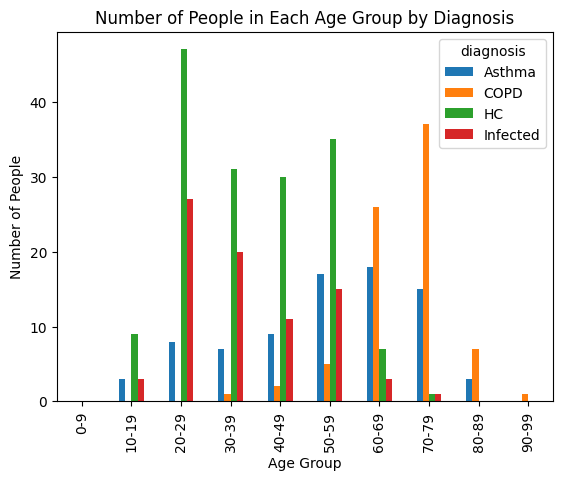

In [110]:
#Now we can see the number of people in each age group by diagnosis

age_diagnosis_number = df.groupby(['age_bin', 'diagnosis'])['diagnosis'].count()

# plot a histogram of the number of people in each age group by diagnosis
age_diagnosis_number.unstack().plot(kind='bar')

# set the plot title and axis labels
plt.title('Number of People in Each Age Group by Diagnosis')
plt.xlabel('Age Group')
plt.ylabel('Number of People')

# show the plot
plt.show()


In [111]:
#Now to see the mean and variance of the ages of those studied

age_stats = df.groupby('diagnosis')['age'].agg(['mean', 'var', 'count'])

age_stats

,mean,var,count
diagnosis,,,
Asthma,55.375000,319.123418,80
COPD,70.873418,84.753002,79
HC,39.487500,176.075314,160
Infected,38.737500,170.398576,80


The table above, shows the mean and variance of age along with the total count of persons diagnosed with a specific ailment. The mean age is higher for COPD compared to the other categories. However, Asmthma also has a higher mean age of 55 compared to the healthy control (HC) and infected persons who have their mean age of 39.5 and 38.7 respectively. Looking into the analysis of the data distribution, that COPD is found particularly later in age than the other diseases studied. This is supported by the variance which is very small compared to the others. In contrast, of the people studied, the healthy control subjects were typically younger. It is also clear that the healthy control diagnosis has the most people within it by double any of the other categories. 

In [112]:
#Now I can export my datframe as new_data.csv so my group members can use that csv file

df.to_csv('new_data.csv', index=False)